<a href="https://colab.research.google.com/github/MightyManjaly/Datascience_Project/blob/main/Finetuning_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import zipfile
import os

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import zipfile
import os

# Define the path to the ZIP file
zip_file_path = '/content/drive/MyDrive/processed_images.zip'

# Define the directory to extract to
extract_dir = '/New_Processed'

# Create the directory if it doesn't exist
os.makedirs(extract_dir, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"Files unzipped to {extract_dir}")


Files unzipped to /New_Processed


In [4]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split



# Step 2: List processed images and save to CSV
processed_dir = '/New_Processed/processed_images'

# List all processed image files
processed_filepaths = []
for filename in os.listdir(processed_dir):
    if filename.endswith('.jpeg'):
        processed_filepaths.append(os.path.join(processed_dir, filename))

# Create a DataFrame with the file paths
df = pd.DataFrame({
    'processed_filepaths': processed_filepaths
})

# Save the DataFrame to a CSV file
processed_df_path = '/New_Processed/processed_image_data.csv'
df.to_csv(processed_df_path, index=False)

print("Processed image paths saved to CSV.")

# Step 3: Load the CSV file containing processed image paths
df = pd.read_csv(processed_df_path)

# Load the CSV file with labels
csv_file_path = '/content/drive/MyDrive/trainLabels.csv'
labels_df = pd.read_csv(csv_file_path)

# Display the first few rows of the CSV to understand its structure
print("CSV File Preview:")
print(labels_df.head())

# Step 4: Merge with labels
# Assuming 'image' and 'level' are the columns in the CSV
labels_df['image'] = labels_df['image'].apply(lambda x: x + '.jpeg')  # Append .jpeg to the image names if not already present

# Extract image names from file paths in df
df['image'] = df['processed_filepaths'].apply(lambda x: os.path.basename(x))

# Merge the CSV data with the processed file paths
merged_df = df.merge(labels_df, left_on='image', right_on='image')

# Step 5: Split data into training and testing sets
train_df, test_df = train_test_split(merged_df, test_size=0.2, stratify=merged_df['level'], random_state=42)

# Print the number of images in each class for both the training and testing sets
print("Training set class distribution:")
print(train_df['level'].value_counts())

print("Testing set class distribution:")
print(test_df['level'].value_counts())

# Step 6: Save the training and testing DataFrames for future use
train_df.to_csv('/train_data.csv', index=False)
test_df.to_csv('/test_data.csv', index=False)

# Optionally, display the DataFrame to verify the results
#import ace_tools as tools; tools.display_dataframe_to_user(name="Train DataFrame", dataframe=train_df)
#tools.display_dataframe_to_user(name="Test DataFrame", dataframe=test_df)


Processed image paths saved to CSV.
CSV File Preview:
      image  level
0   10_left      0
1  10_right      0
2   13_left      0
3  13_right      0
4   15_left      1
Training set class distribution:
level
0    20648
2     4234
1     1954
3      698
4      566
Name: count, dtype: int64
Testing set class distribution:
level
0    5162
2    1058
1     489
3     175
4     142
Name: count, dtype: int64


In [5]:
import tensorflow as tf
from tensorflow.keras.models import load_model
model_save_path = '/content/drive/MyDrive/Final_Cardio_Vas.h5'
model = load_model(model_save_path)

In [6]:
import os
import numpy as np
import pandas as pd
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from google.colab import drive


# Warnings
import warnings
warnings.filterwarnings('ignore')
# -----------------4. Set Up Data Generators----------------#

# Split the DataFrame into training and validation sets
#train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

# Check the distribution of labels in train and val sets
#print("Train set label distribution:\n", train_df['labels'].value_counts())
#print("Validation set label distribution:\n", val_df['labels'].value_counts())

# Convert the 'level' column to string type
train_df['level'] = train_df['level'].astype(str)
test_df['level'] = test_df['level'].astype(str)

# Define image data generators with increased data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col='processed_filepaths',
    y_col='level',
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_dataframe(
    test_df,
    x_col='processed_filepaths',
    y_col='level',
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical'
)

Found 28100 validated image filenames belonging to 5 classes.
Found 7026 validated image filenames belonging to 5 classes.


87910968/87910968 [==============================] - 0s 0us/step


Epoch 1/10
878/878 [==============================] - 748s 836ms/step - loss: 0.8733 - accuracy: 0.7300 - val_loss: 0.8043 - val_accuracy: 0.7347
Epoch 2/10
878/878 [==============================] - 722s 822ms/step - loss: 0.8195 - accuracy: 0.7359 - val_loss: 0.7803 - val_accuracy: 0.7370
Epoch 3/10
878/878 [==============================] - 727s 828ms/step - loss: 0.8084 - accuracy: 0.7361 - val_loss: 0.7934 - val_accuracy: 0.7374
Epoch 4/10
878/878 [==============================] - 722s 822ms/step - loss: 0.8008 - accuracy: 0.7359 - val_loss: 0.7643 - val_accuracy: 0.7396
Epoch 5/10
878/878 [==============================] - 727s 828ms/step - loss: 0.7964 - accuracy: 0.7371 - val_loss: 0.7633 - val_accuracy: 0.7410
Epoch 6/10
878/878 [==============================] - 718s 817ms/step - loss: 0.7916 - accuracy: 0.7386 - val_loss: 0.7599 - val_accuracy: 0.7397
Epoch 7/10
878/878 [==============================] - 729s 830ms/step - loss: 0.7879 - accuracy: 0.7386 - val_loss: 0.7721 -

Epoch 1/10
878/878 [==============================] - 739s 831ms/step - loss: 0.8020 - accuracy: 0.7371 - val_loss: 0.7658 - val_accuracy: 0.7437
Epoch 2/10
878/878 [==============================] - 728s 829ms/step - loss: 0.7703 - accuracy: 0.7428 - val_loss: 0.7227 - val_accuracy: 0.7509
Epoch 3/10
878/878 [==============================] - 725s 826ms/step - loss: 0.7565 - accuracy: 0.7469 - val_loss: 0.7202 - val_accuracy: 0.7519
Epoch 4/10
878/878 [==============================] - 720s 820ms/step - loss: 0.7488 - accuracy: 0.7497 - val_loss: 0.7093 - val_accuracy: 0.7553
Epoch 5/10
878/878 [==============================] - 722s 823ms/step - loss: 0.7395 - accuracy: 0.7524 - val_loss: 0.7241 - val_accuracy: 0.7586
Epoch 6/10
878/878 [==============================] - 720s 820ms/step - loss: 0.7362 - accuracy: 0.7549 - val_loss: 0.7076 - val_accuracy: 0.7590
Epoch 7/10
878/878 [==============================] - 722s 823ms/step - loss: 0.7300 - accuracy: 0.7558 - val_loss: 0.7087 -

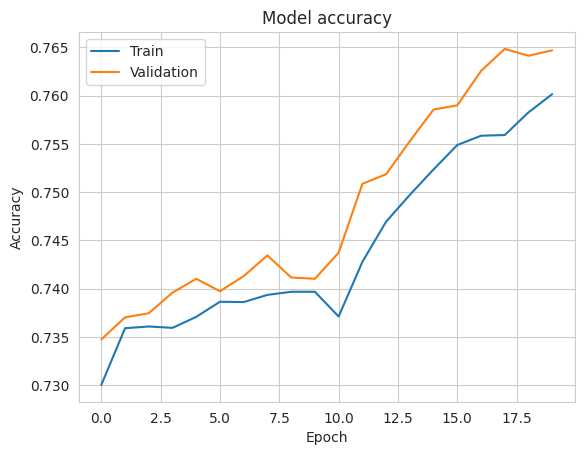

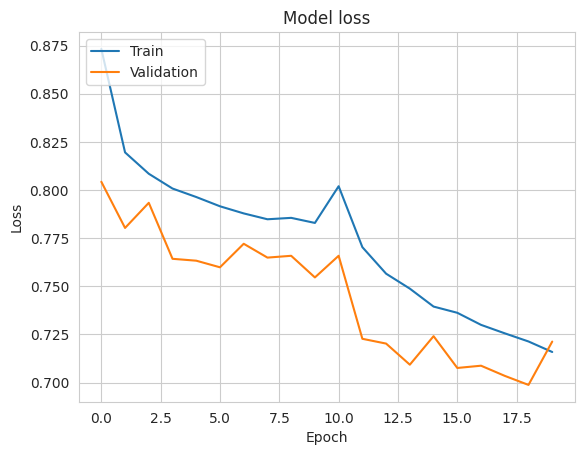

In [7]:
#Fine Tuning
# Step 4: Load the pre-trained InceptionV3 model and fine-tune
base_model = InceptionV3(weights='imagenet', include_top=False)

# Add custom top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(5, activation='softmax')(x)  # Assuming 5 classes

# This is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of InceptionV3 base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Step 5: Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    epochs=10  # Start with a few epochs for initial training
)

# Unfreeze some layers of the base model for fine-tuning
for layer in base_model.layers[-30:]:  # Unfreeze the last 30 layers
    layer.trainable = True

# Recompile the model with a lower learning rate
model.compile(optimizer=Adam(lr=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])

# Fine-tune the model
history_finetune = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    epochs=10  # Additional epochs for fine-tuning
)

# Step 6: Evaluate the model
val_loss, val_accuracy = model.evaluate(val_generator)
print(f'Validation accuracy: {val_accuracy:.2f}')

# Step 7: Save the model
model.save('/content/drive/MyDrive/finetuned_inceptionv3_cvd.h5')

# Optional: Plot the training history
plt.plot(history.history['accuracy'] + history_finetune.history['accuracy'])
plt.plot(history.history['val_accuracy'] + history_finetune.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'] + history_finetune.history['loss'])
plt.plot(history.history['val_loss'] + history_finetune.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Found 7026 validated image filenames belonging to 5 classes.
110/110 [==============================] - 61s 469ms/step


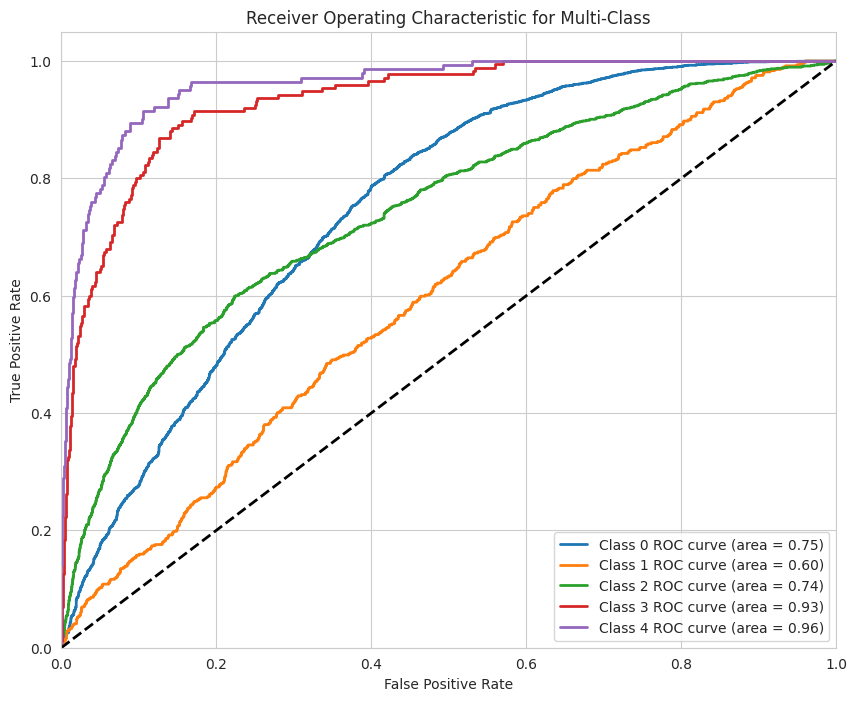

In [8]:
#ROC Curve

import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
from google.colab import drive


# Step 3: Load the test data
test_data_path = '/test_data.csv'  # Adjust the path as needed
test_df = pd.read_csv(test_data_path)

# Convert the 'level' column to string type
test_df['level'] = test_df['level'].astype(str)

# Step 4: Create the ImageDataGenerator for validation data
val_datagen = ImageDataGenerator(rescale=1./255)

# Create validation generator
val_generator = val_datagen.flow_from_dataframe(
    test_df,
    x_col='processed_filepaths',
    y_col='level',
    target_size=(299, 299),
    batch_size=64,
    class_mode='categorical',
    shuffle=False  # Important to keep data order for correct predictions
)

# Step 5: Make predictions on the validation data
y_pred_prob = model.predict(val_generator, steps=val_generator.n // val_generator.batch_size + 1, verbose=1)

# Ensure y_test is a numpy array of true labels
y_test = np.array(val_generator.classes[:len(y_pred_prob)])

# Step 6: Compute ROC curve and ROC area for each class
n_classes = len(val_generator.class_indices)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Step 7: Plot all ROC curves
plt.figure(figsize=(10, 8))

colors = plt.cm.get_cmap('tab10').colors  # Use a colormap with enough distinct colors
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} ROC curve (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multi-Class')
plt.legend(loc="lower right")
plt.show()


Found 7026 validated image filenames belonging to 5 classes.
110/110 [==============================] - 45s 404ms/step


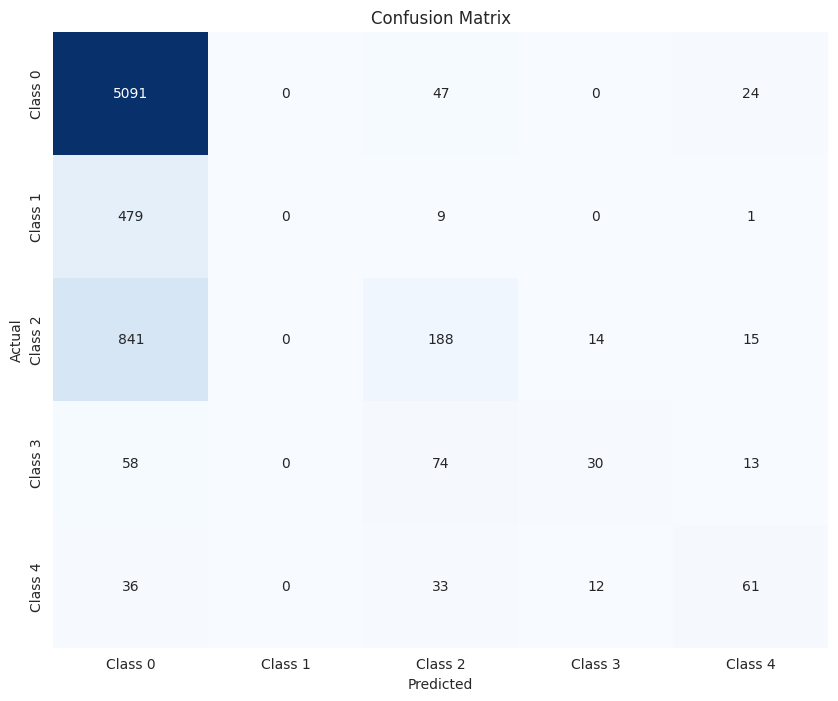

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import drive



# Step 3: Load the test data
test_data_path = '/test_data.csv'  # Adjust the path as needed
test_df = pd.read_csv(test_data_path)

# Convert the 'level' column to string type
test_df['level'] = test_df['level'].astype(str)

# Step 4: Create the ImageDataGenerator for validation data
val_datagen = ImageDataGenerator(rescale=1./255)

# Create validation generator
val_generator = val_datagen.flow_from_dataframe(
    test_df,
    x_col='processed_filepaths',
    y_col='level',
    target_size=(299, 299),
    batch_size=64,
    class_mode='categorical',
    shuffle=False  # Important to keep data order for correct predictions
)

# Step 5: Make predictions on the validation data
y_pred_prob = model.predict(val_generator, steps=val_generator.n // val_generator.batch_size + 1, verbose=1)
y_pred = np.argmax(y_pred_prob, axis=1)

# Ensure y_test is a numpy array of true labels
y_test = np.array(val_generator.classes[:len(y_pred)])

# Step 6: Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=[f"Class {i}" for i in range(len(val_generator.class_indices))], columns=[f"Class {i}" for i in range(len(val_generator.class_indices))])

# Step 7: Visualize the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Found 7026 validated image filenames belonging to 5 classes.


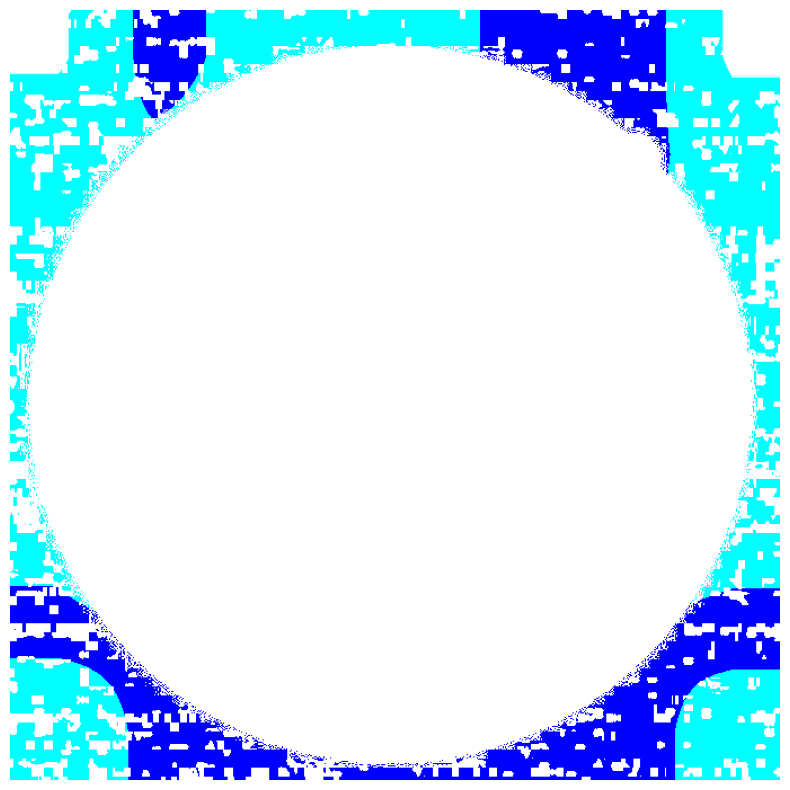

In [13]:
#Heat Map of the retina images
# Create ImageDataGenerator for validation data
from tensorflow.keras.preprocessing import image
val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_dataframe(
    test_df,
    x_col='processed_filepaths',
    y_col='level',
    target_size=(299, 299),
    batch_size=64,
    class_mode='categorical',
    shuffle=False
)
def get_img_array(img_path, size):
    img = image.load_img(img_path, target_size=size)
    array = image.img_to_array(img)
    array = np.expand_dims(array, axis=0)
    array /= 255.0
    return array

def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = Model([model.inputs], [model.get_layer(last_conv_layer_name).output, model.output])
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

def display_gradcam(img_path, heatmap, alpha=0.4):
    img = cv2.imread(img_path)
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = heatmap * alpha + img
    return superimposed_img

# Example for a single image
img_path = test_df['processed_filepaths'].iloc[0]
img_array = get_img_array(img_path, size=(299, 299))
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name='mixed10')  # Replace with your model's last conv layer name
superimposed_img = display_gradcam(img_path, heatmap)

plt.figure(figsize=(10, 10))
plt.imshow(superimposed_img[..., ::-1])  # Convert BGR to RGB
plt.axis('off')
plt.show()


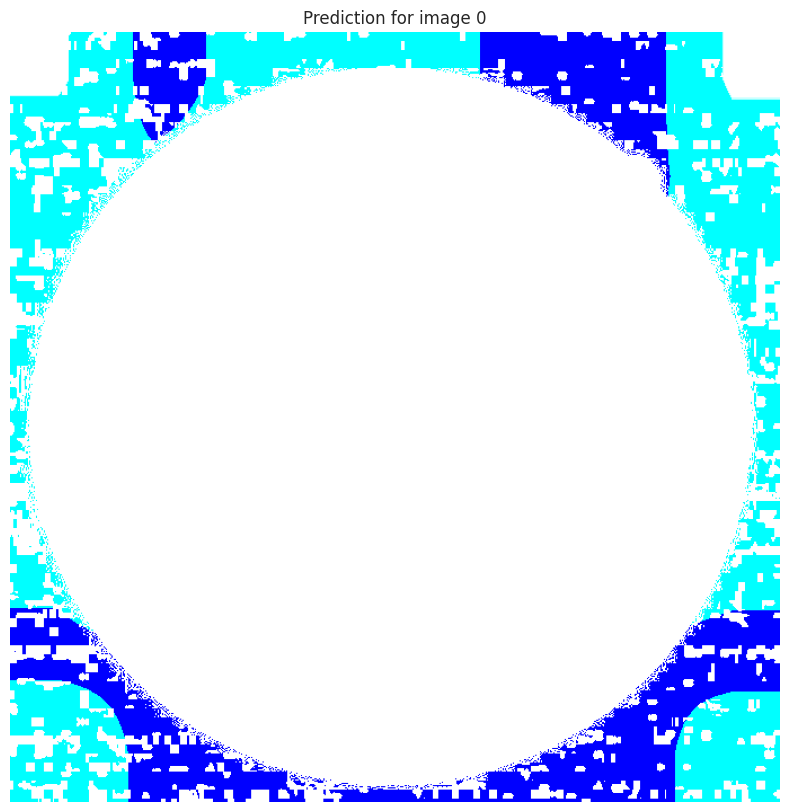

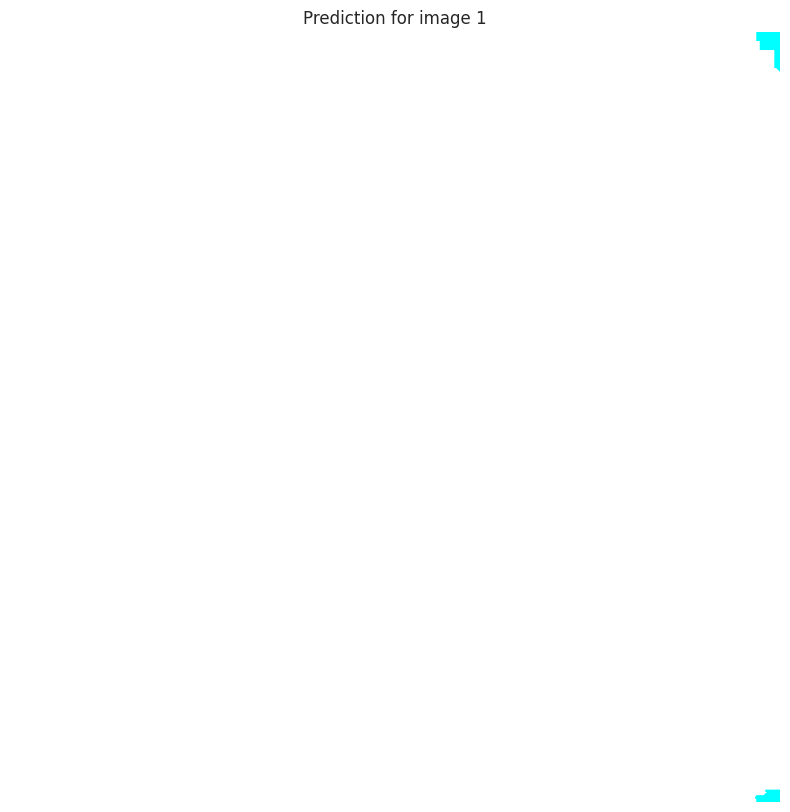

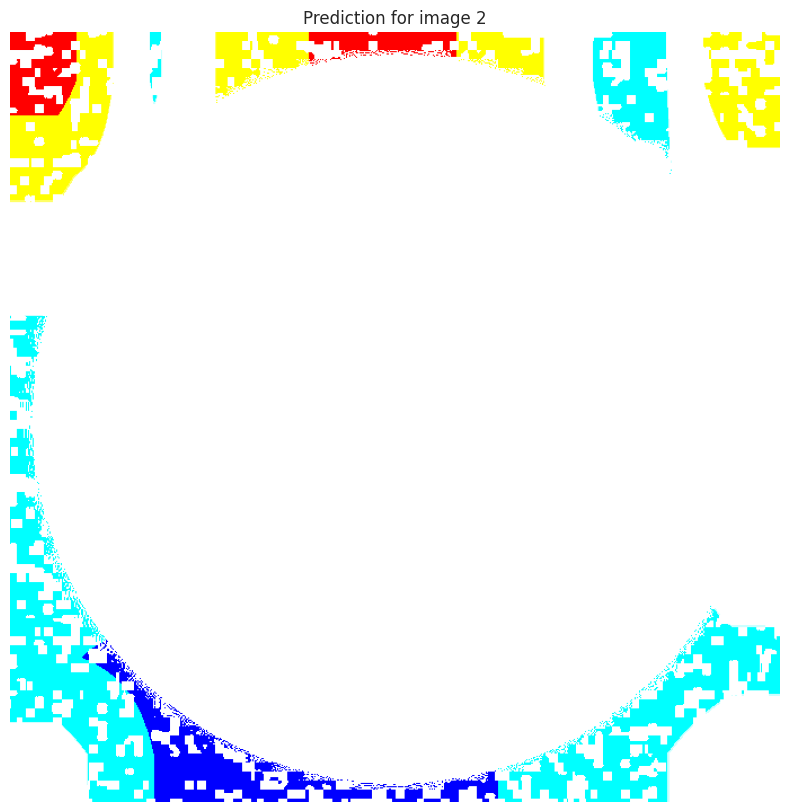

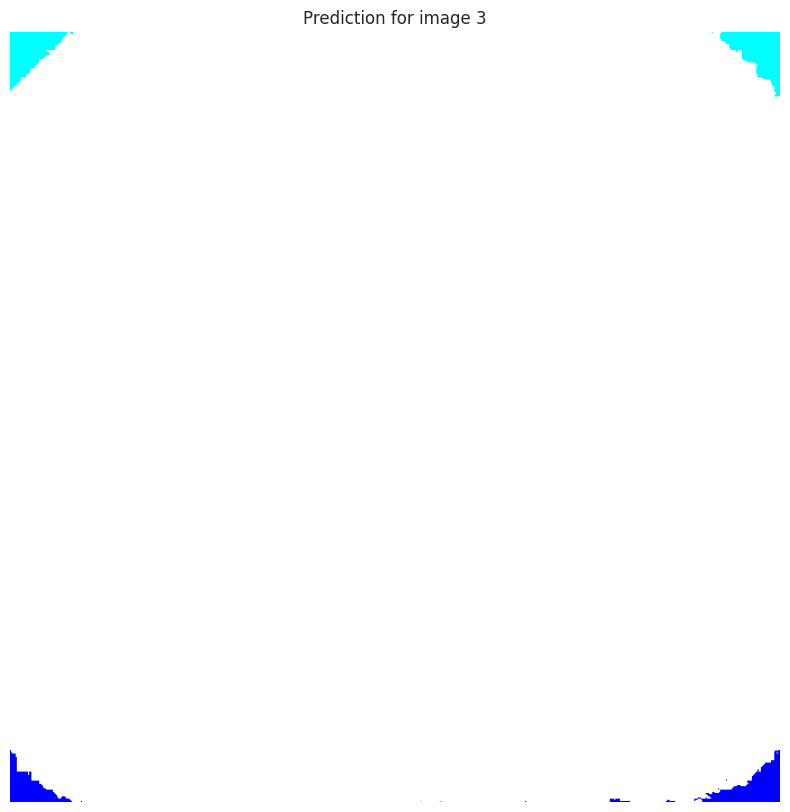

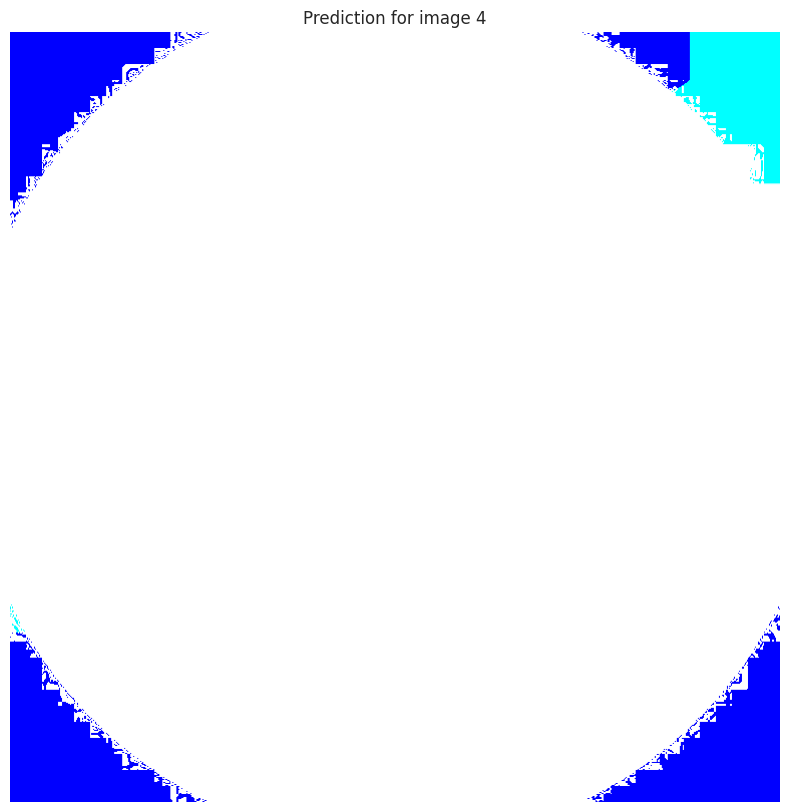

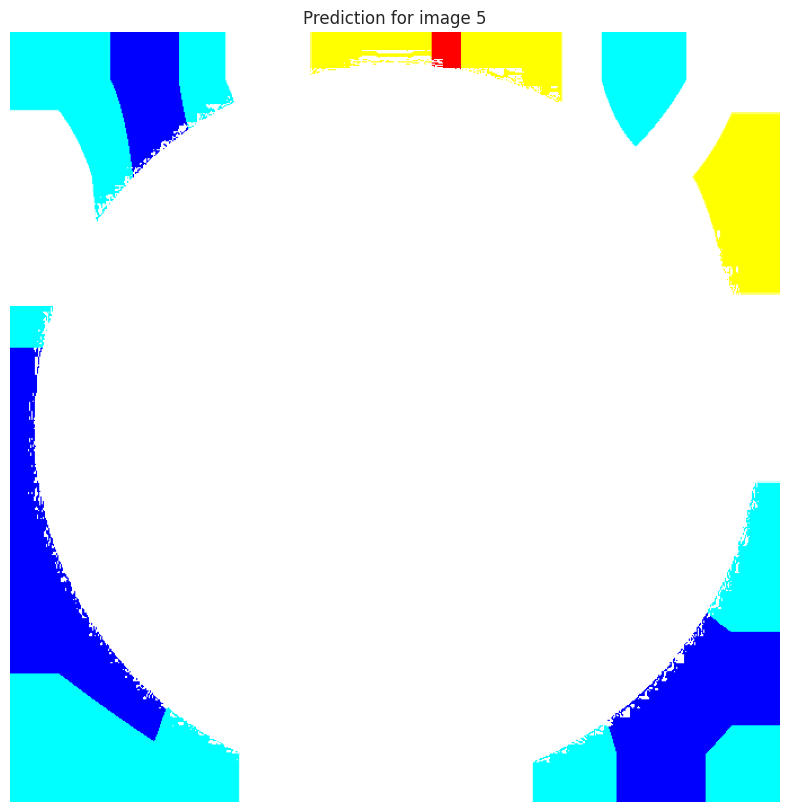

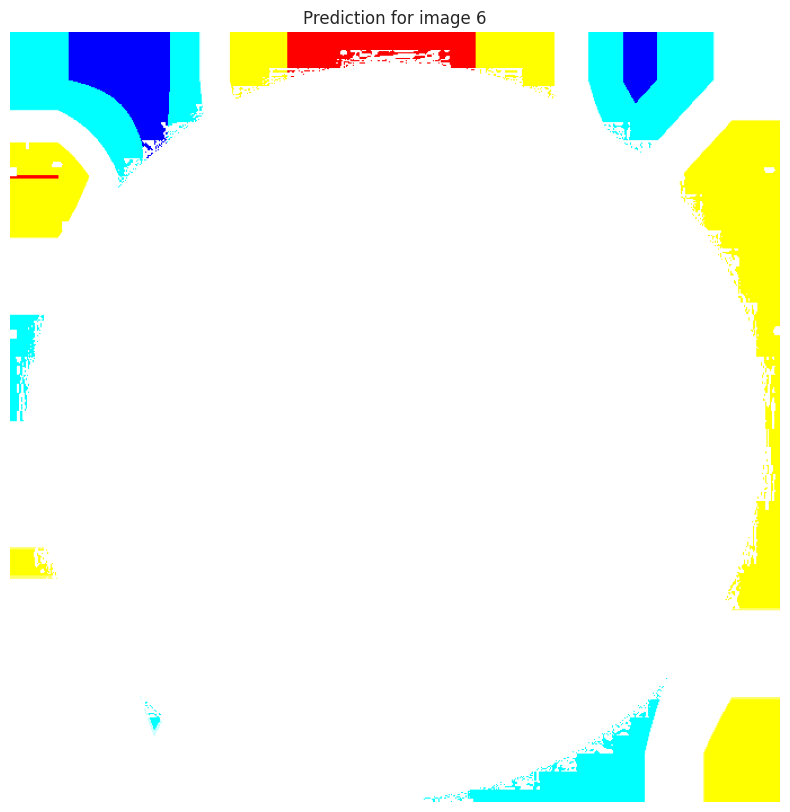

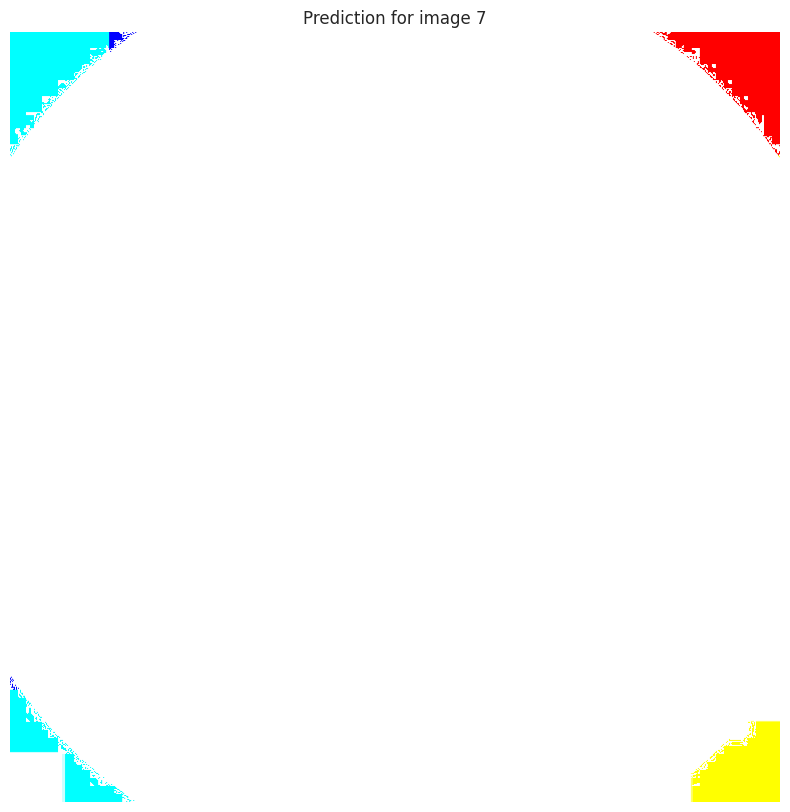

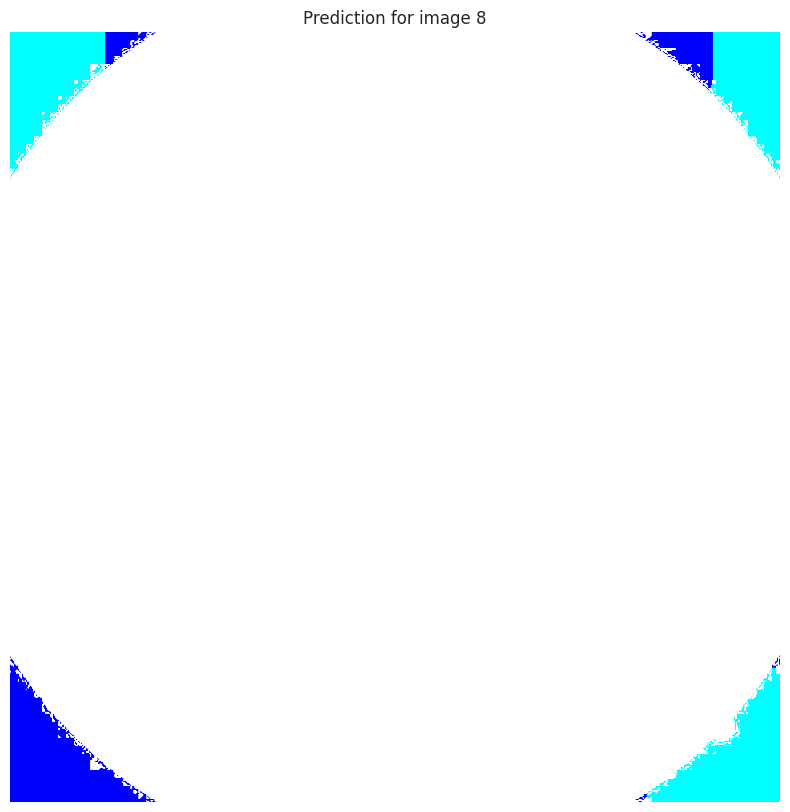

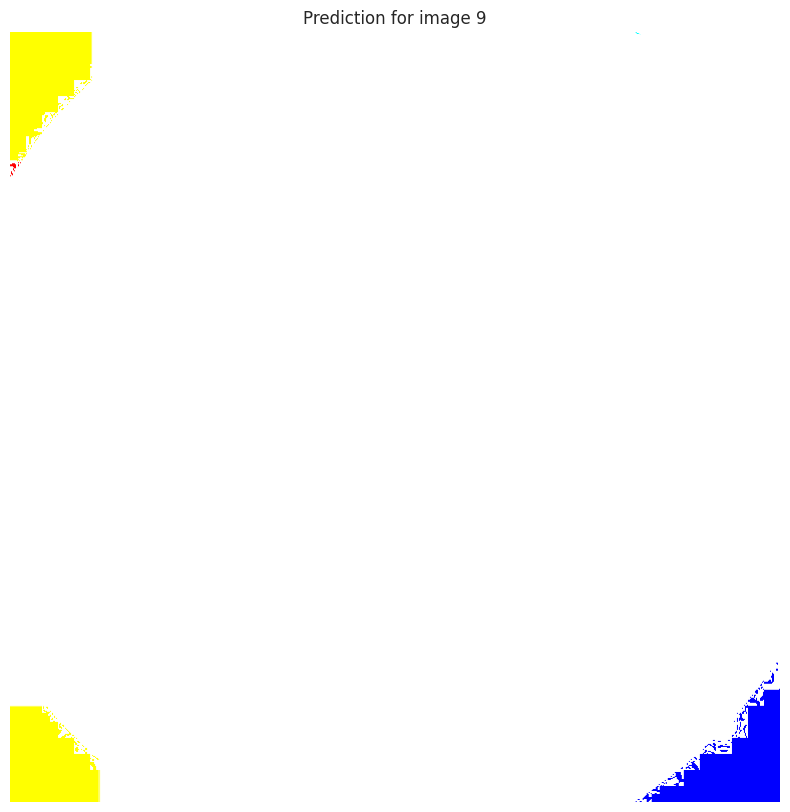

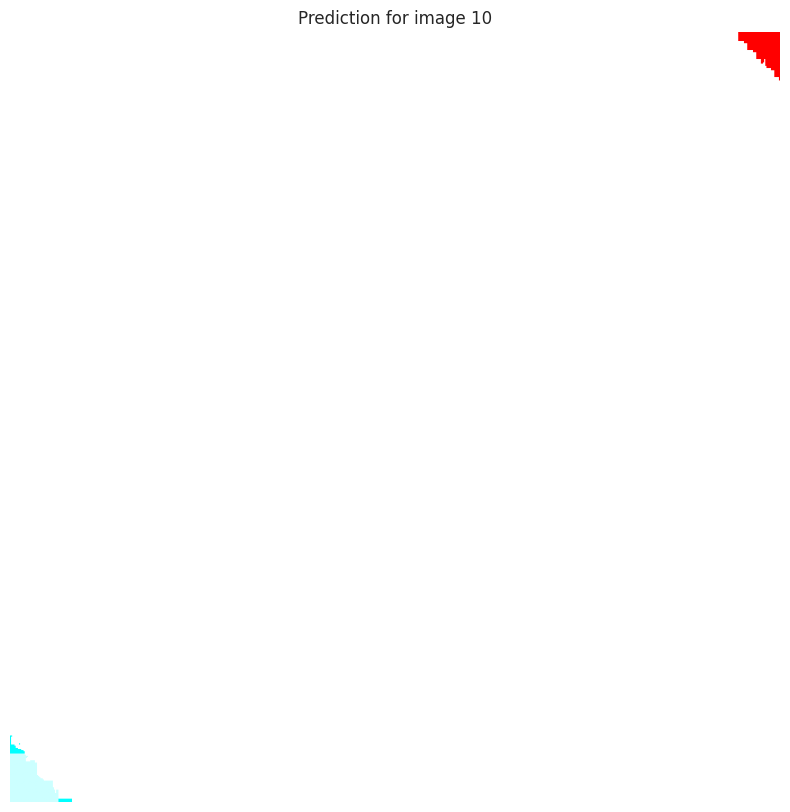

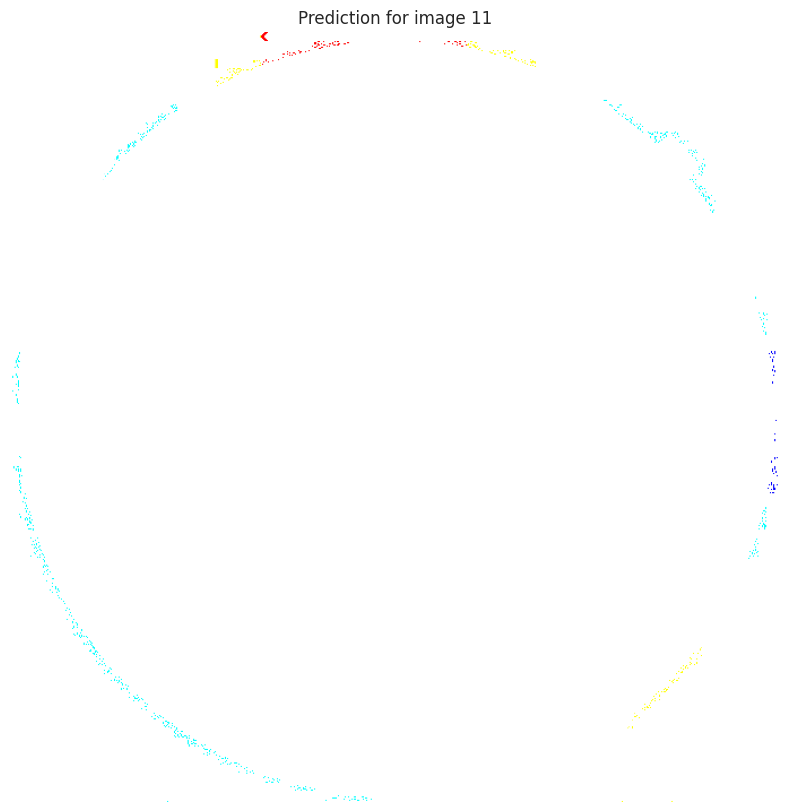

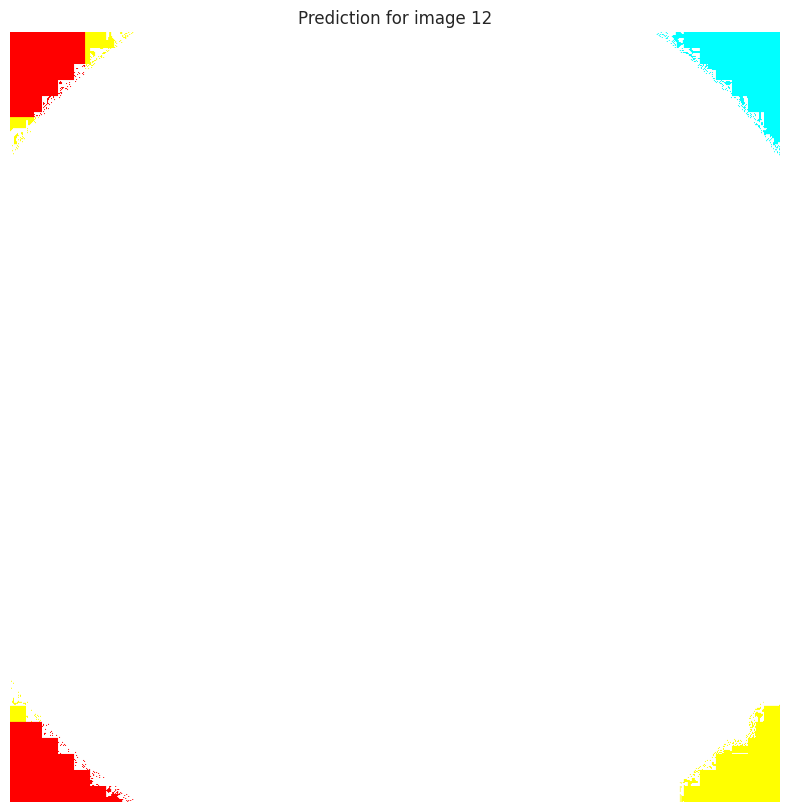

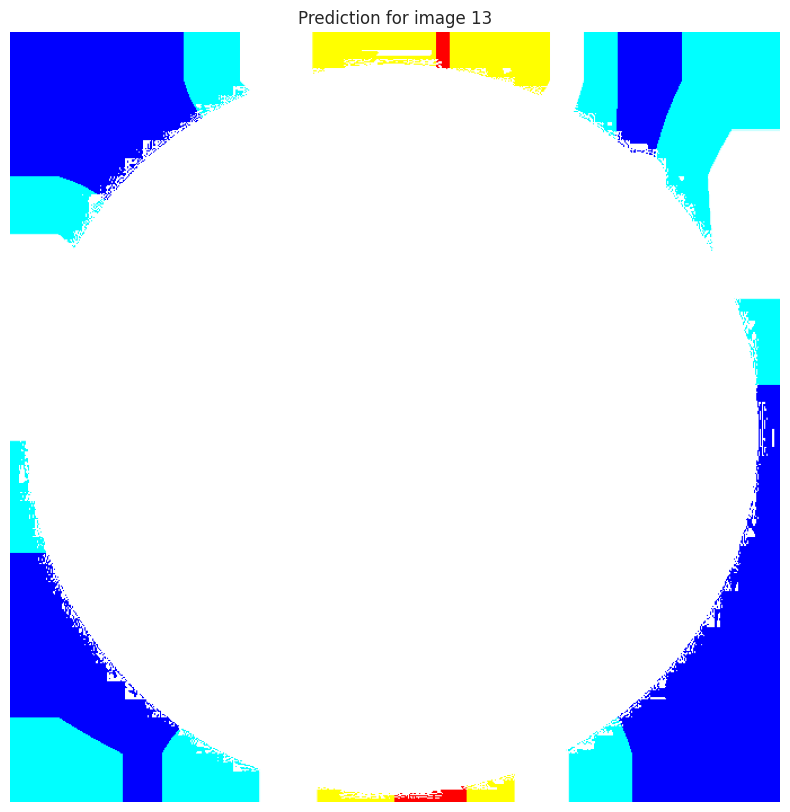

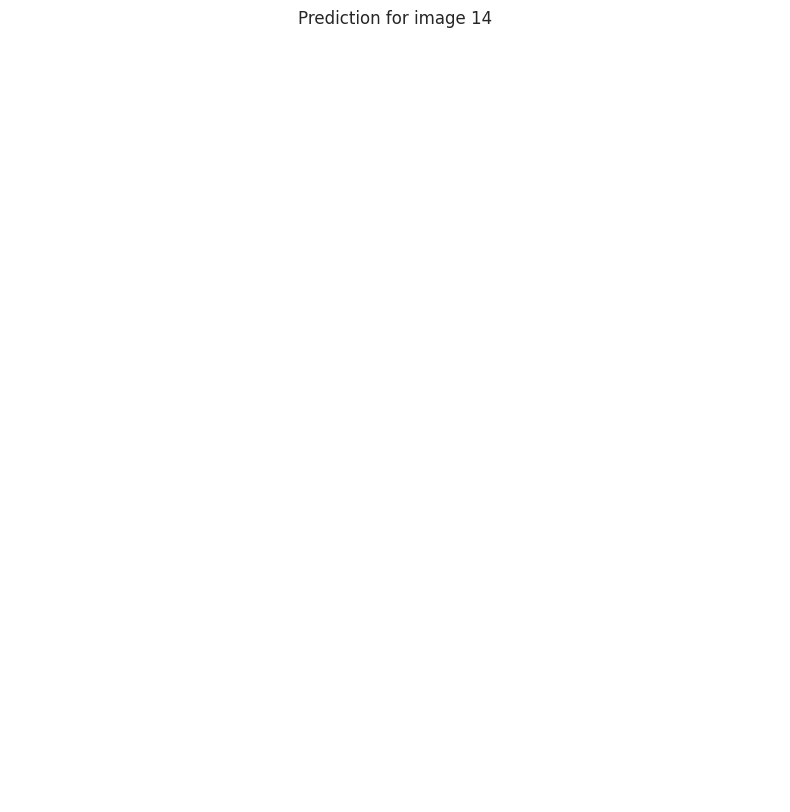

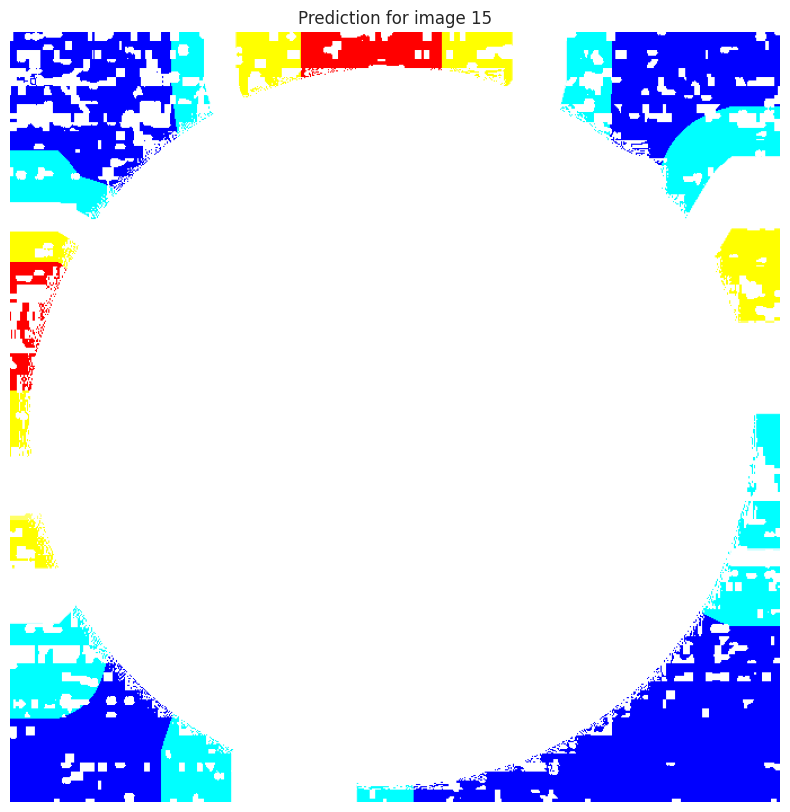

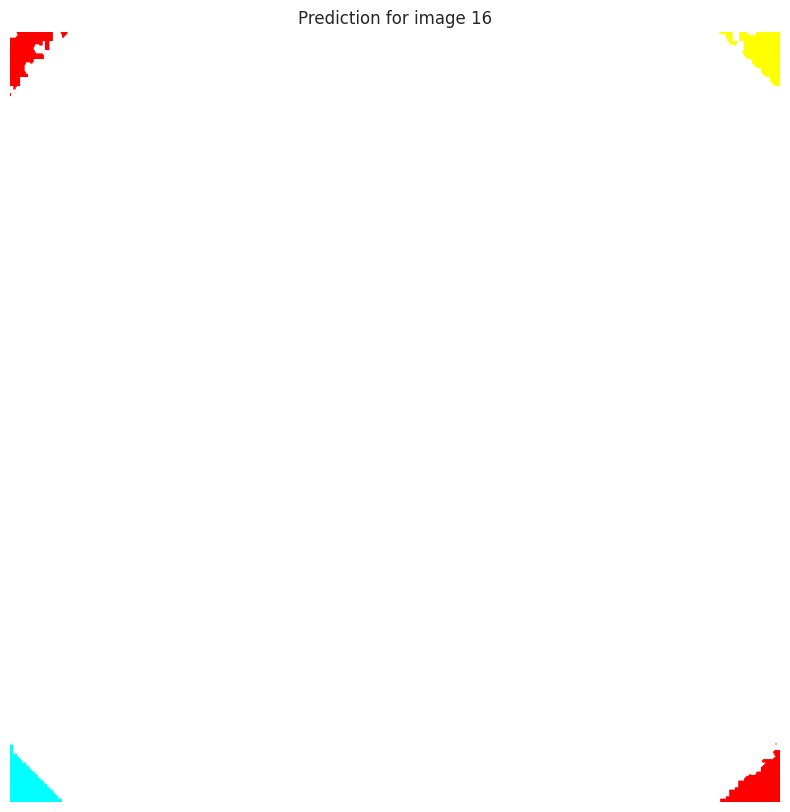

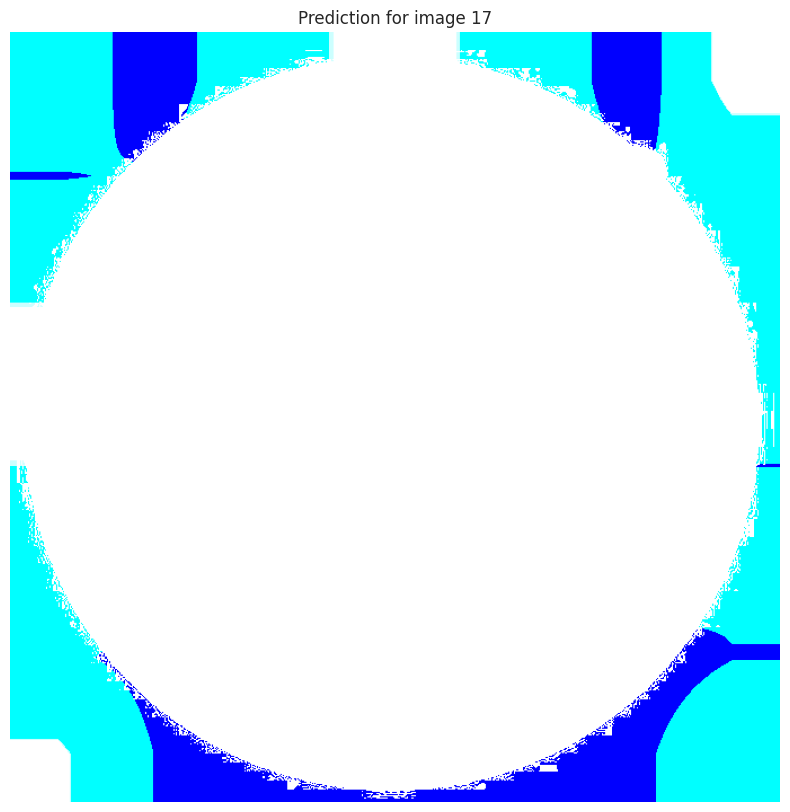

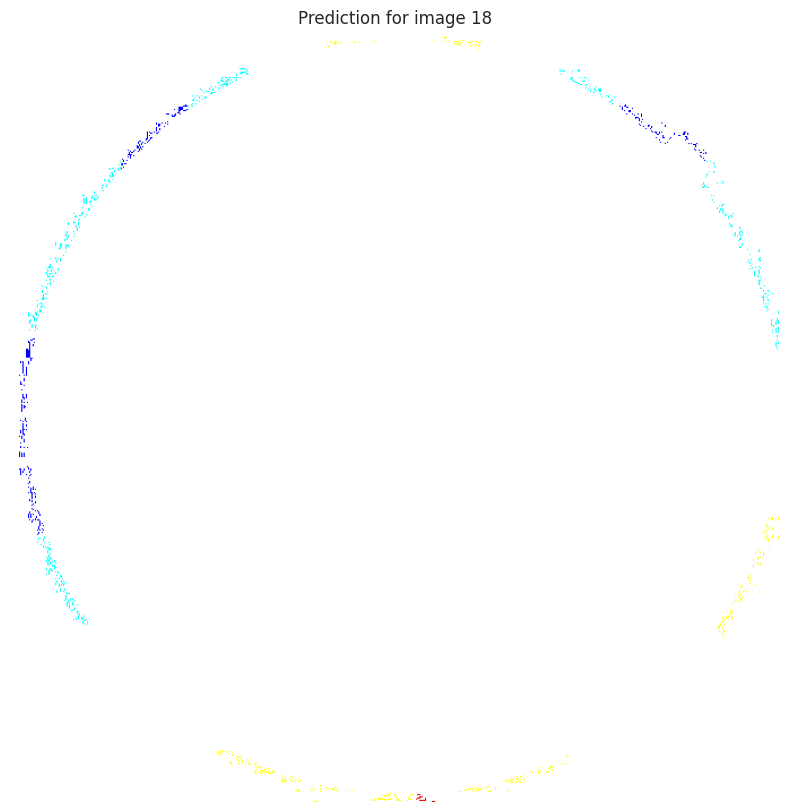

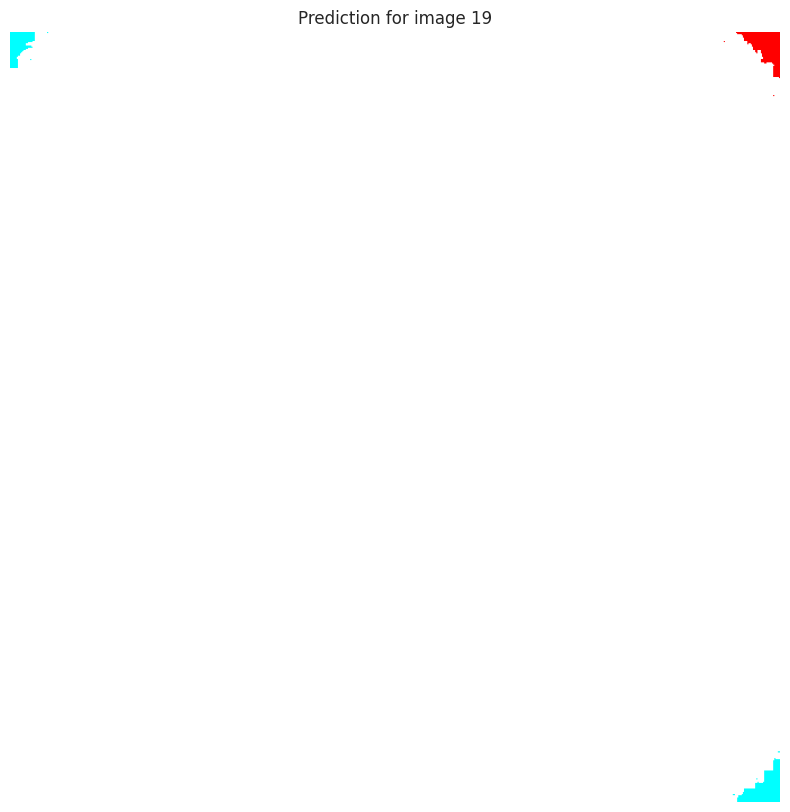

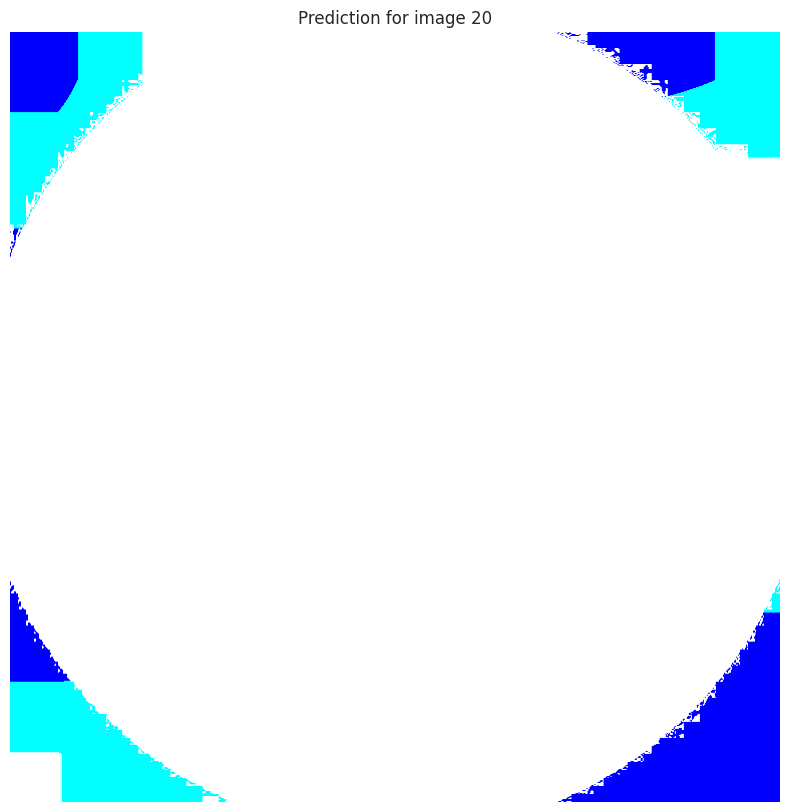

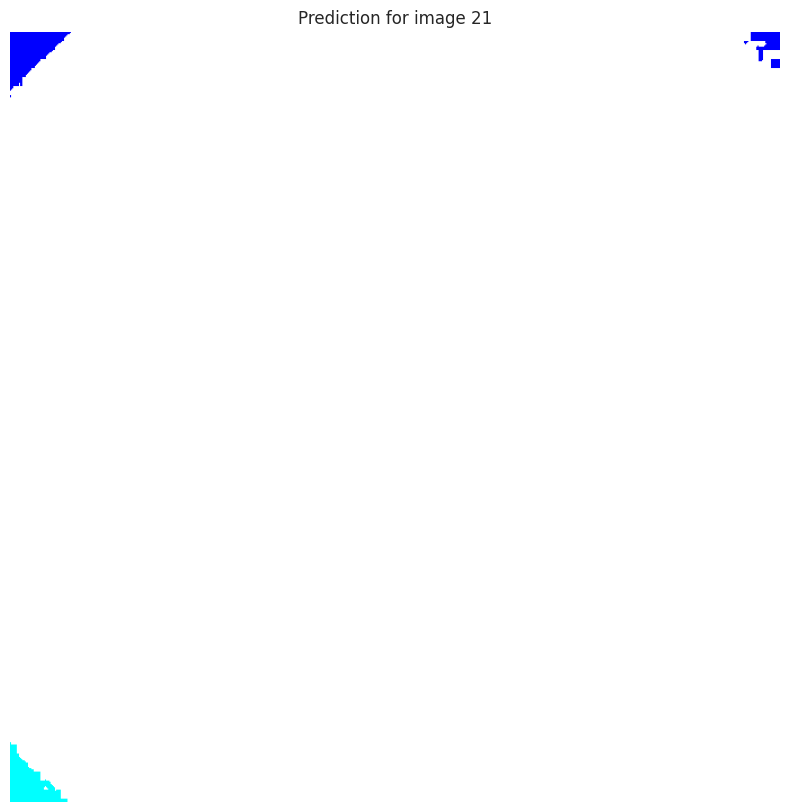

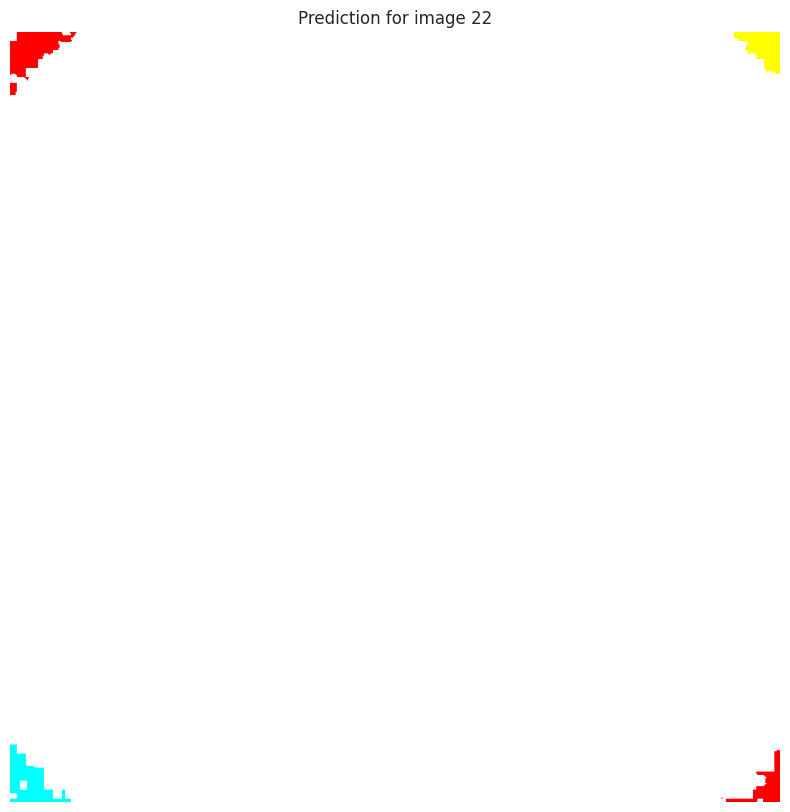

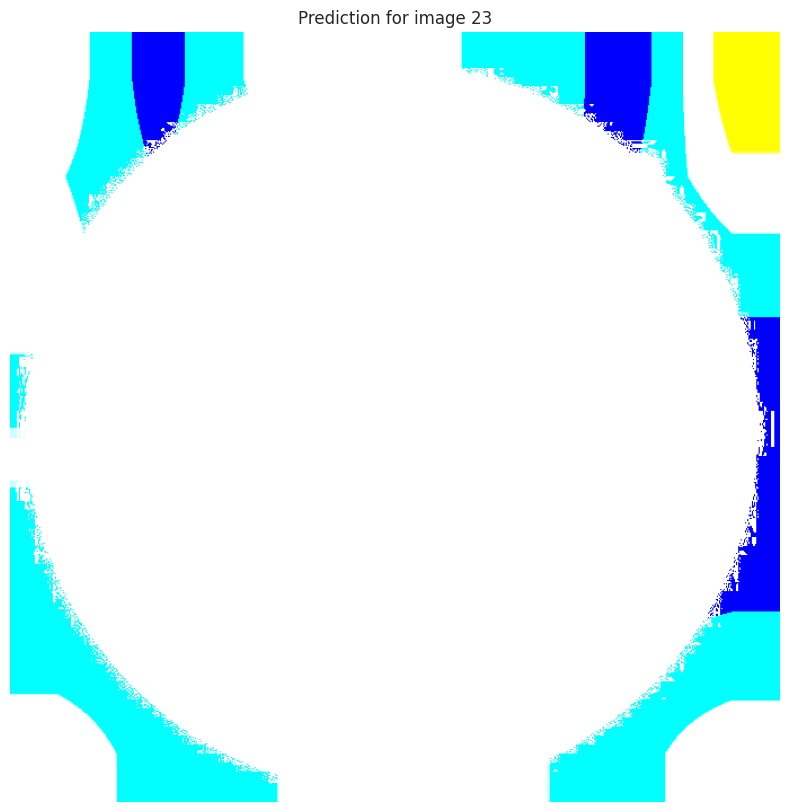

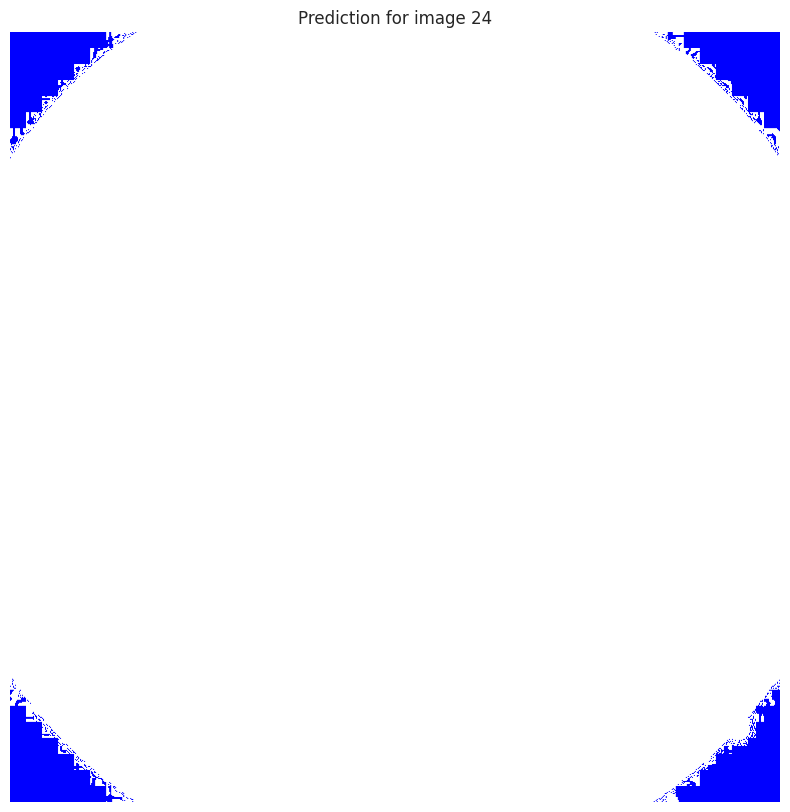

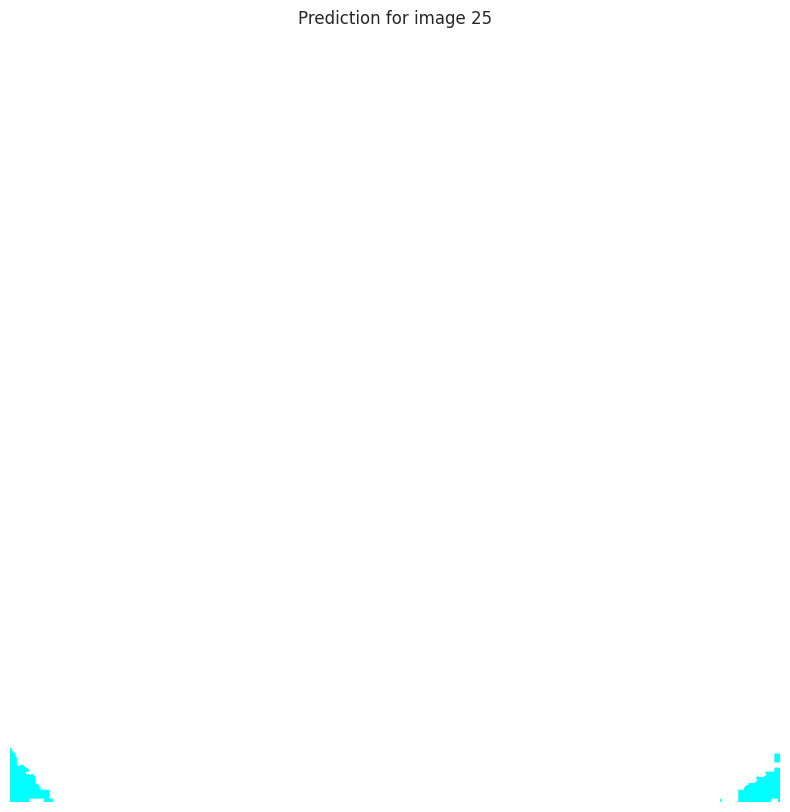

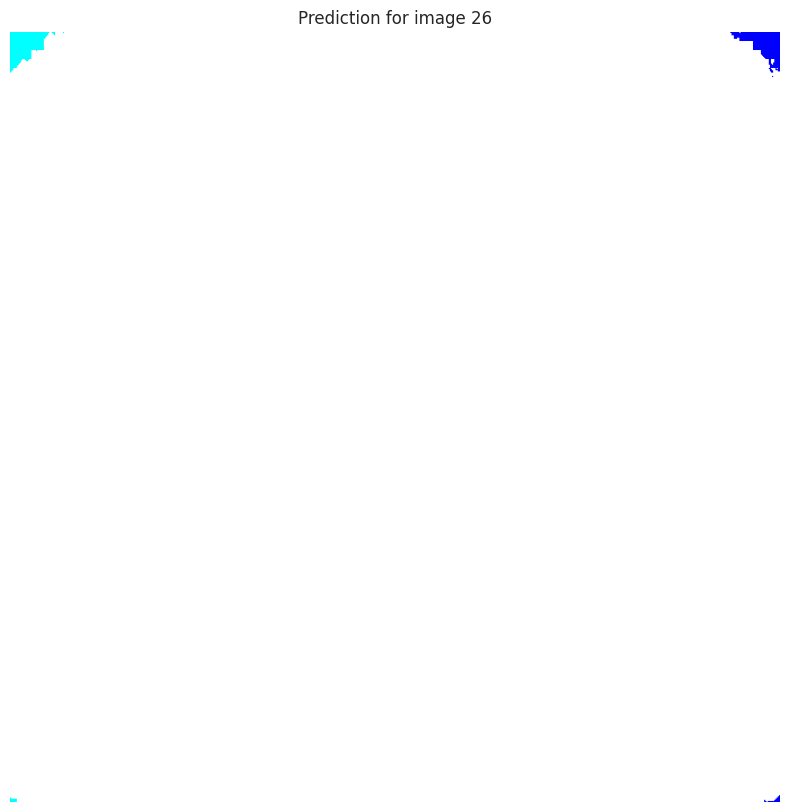

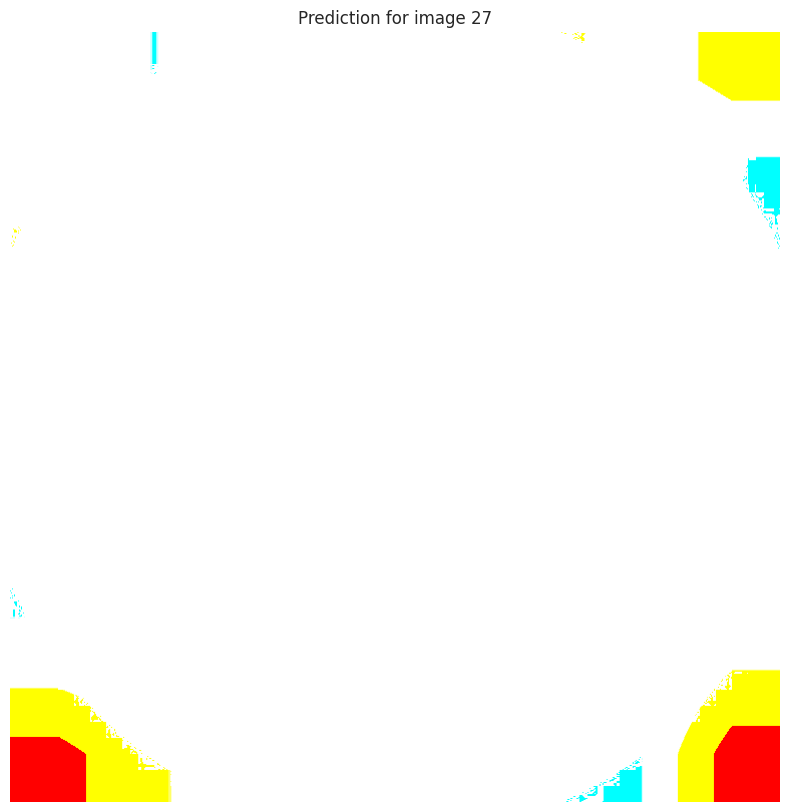

KeyboardInterrupt: 

In [14]:
for i in range(len(test_df)):
    img_path = test_df['processed_filepaths'].iloc[i]
    img_array = get_img_array(img_path, size=(299, 299))
    heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name='mixed10')  # Replace with your model's last conv layer name
    superimposed_img = display_gradcam(img_path, heatmap)

    plt.figure(figsize=(10, 10))
    plt.imshow(superimposed_img[..., ::-1])  # Convert BGR to RGB
    plt.title(f"Prediction for image {i}")
    plt.axis('off')
    plt.show()

In [15]:
# Display multiple images in a grid
n_images = len(test_df)
n_cols = 6  # Number of images per row
n_rows = (n_images + n_cols - 1) // n_cols  # Calculate the number of rows needed

plt.figure(figsize=(20, n_rows * 4))

for i in range(n_images):
    img_path = test_df['processed_filepaths'].iloc[i]
    img_array = get_img_array(img_path, size=(299, 299))
    heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name='mixed10')  # Replace with your model's last conv layer name
    superimposed_img = display_gradcam(img_path, heatmap)

    plt.subplot(n_rows, n_cols, i + 1)
    plt.imshow(superimposed_img[..., ::-1])  # Convert BGR to RGB
    plt.title(f"Prediction for image {i}")
    plt.axis('off')

plt.tight_layout()
plt.show()

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7b3563354ee0> (for post_execute):


ValueError: Image size of 2000x468400 pixels is too large. It must be less than 2^16 in each direction.

ValueError: Image size of 2000x468400 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 2000x468400 with 224 Axes>

Found 7026 validated image filenames belonging to 5 classes.


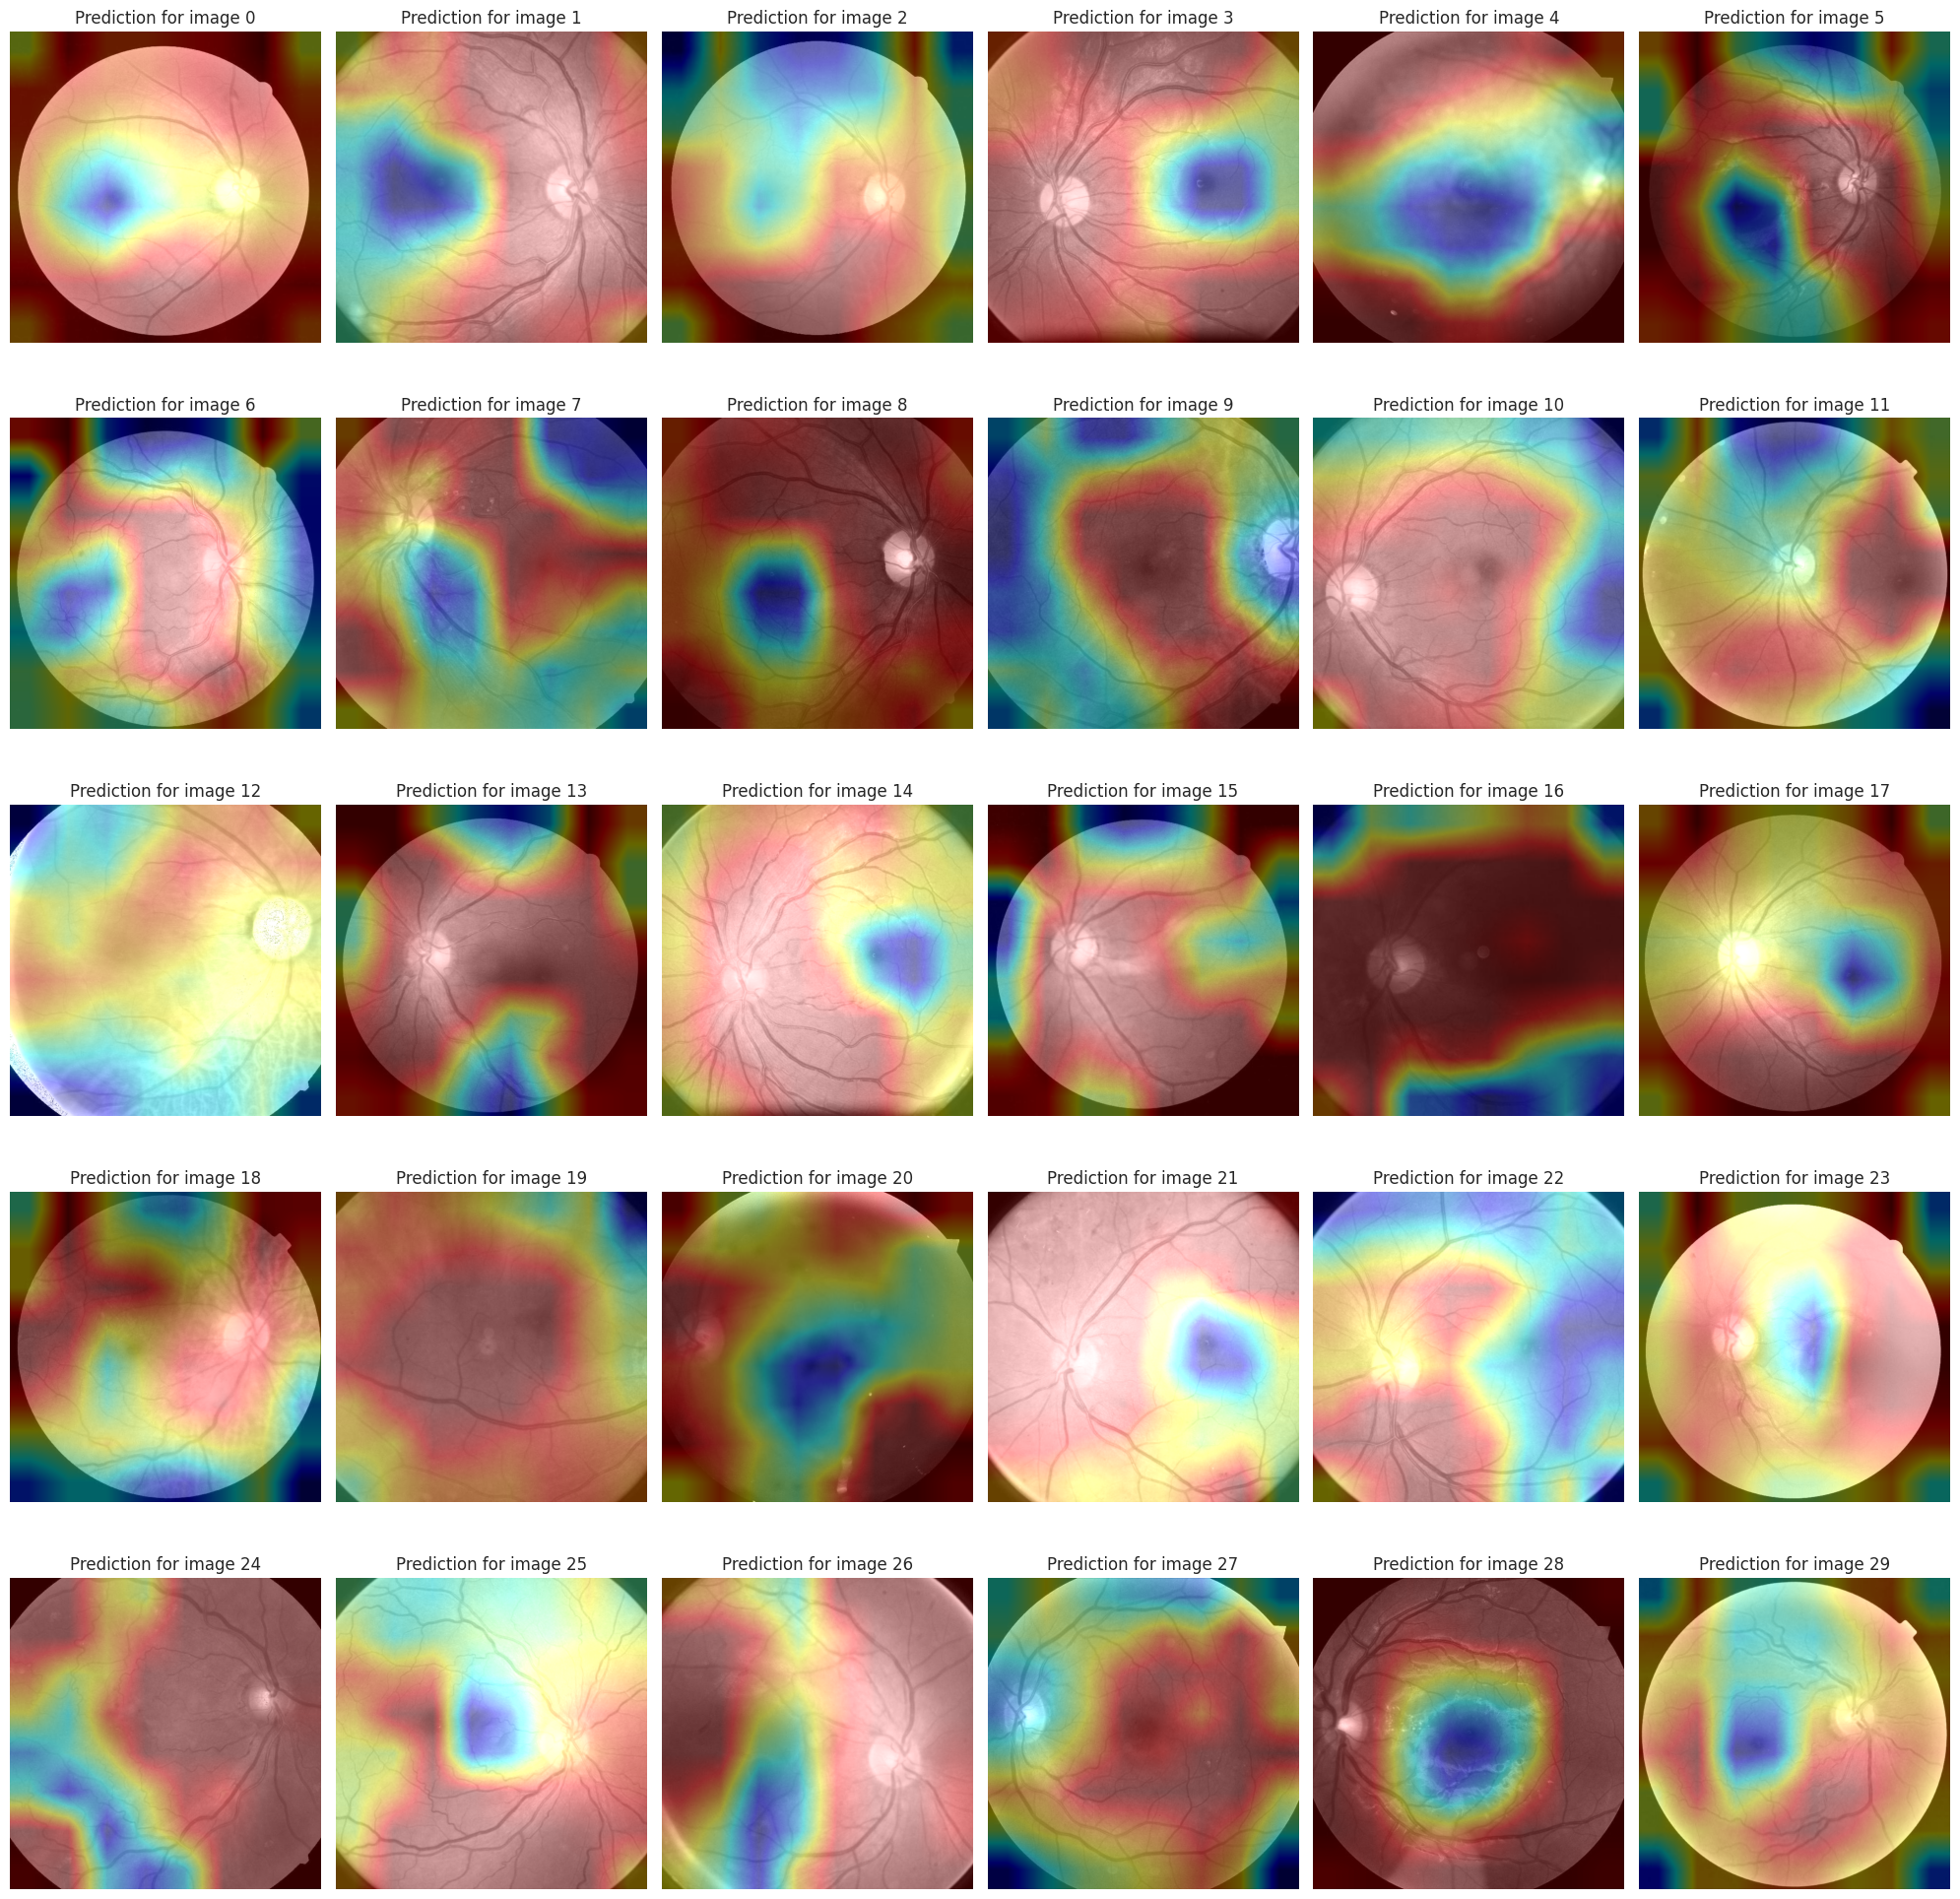

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator



# Create ImageDataGenerator for validation data
val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_dataframe(
    test_df,
    x_col='processed_filepaths',
    y_col='level',
    target_size=(299, 299),
    batch_size=64,
    class_mode='categorical',
    shuffle=False
)

def get_img_array(img_path, size):
    img = image.load_img(img_path, target_size=size)
    array = image.img_to_array(img)
    array = np.expand_dims(array, axis=0)
    array /= 255.0
    return array

def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = Model([model.inputs], [model.get_layer(last_conv_layer_name).output, model.output])
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1))
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

def display_gradcam(img_path, heatmap, alpha=0.4):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = heatmap * alpha + img
    superimposed_img = np.clip(superimposed_img, 0, 255).astype(np.uint8)  # Ensure values are in the valid range
    return superimposed_img

# Display only the first 30 images in a grid
n_images = min(len(test_df), 30)
n_cols = 6  # Number of images per row
n_rows = (n_images + n_cols - 1) // n_cols  # Calculate the number of rows needed

plt.figure(figsize=(20, n_rows * 4))

for i in range(n_images):
    img_path = test_df['processed_filepaths'].iloc[i]
    img_array = get_img_array(img_path, size=(299, 299))
    heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name='mixed10')  # Replace with your model's last conv layer name
    superimposed_img = display_gradcam(img_path, heatmap)

    plt.subplot(n_rows, n_cols, i + 1)
    plt.imshow(superimposed_img)
    plt.title(f"Prediction for image {i}")
    plt.axis('off')

plt.tight_layout()
plt.show()
